
# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'bus_detection_model' 
PRETRAINED_MODEL_NAME = 'ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [1]:
# !pip install -r requirements.txt
!pip install opencv-python
!pip install --upgrade pyqt5 lxml

  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached asttokens-2.0.5-py2.py3-none-any.whl (20 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached backcall-0.2.0-py2.py3-none-any.whl (11 kB)
  Using cached cachetools-5.1.0-py3-none-any.whl (9.2 kB)
  Using cached certifi-2022.5.18.1-py3-none-any.whl (155 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Cython-0.29.30-py2.py3-none-any.whl (985 kB)
  Using cached debugpy-1.6.0-cp39-cp39-win_amd64.whl (4.3 MB)
  Using cached decorator-5.1.1-py3-none-any.whl (9.1 kB)
  Using cached entrypoints-0.4-py3-none-any.whl (5.3 kB)
  Using cached executing-0.8.3-py2.py3-none-any.whl (16 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)

ERROR: Could not find a version that satisfies the requirement object-detection==0.1 (from versions: 0.0.3)
ERROR: No matching distribution found for object-detection==0.1
You should consider upgrading via the 'C:\Users\Lin\Documents\LTA Internship\pidsbus-automatic-error-detection\lta\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
# https://www.tensorflow.org/install/source_windows

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

  Using cached wget-3.2.zip (10 kB)
Using legacy 'setup.py install' for wget, since package 'wheel' is not installed.
    Running setup.py install for wget: started
    Running setup.py install for wget: finished with status 'done'


You should consider upgrading via the 'C:\Users\Lin\Documents\LTA Internship\pidsbus-automatic-error-detection\lta\Scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    # May have to locate and unzip the file manually if there's an error regarding tar command
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 
    

        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\flexible_grid_a

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
error: Setup script exited with error: command 'C:\\Program Files (x86)\\Microsoft Visual Studio\\2019\\Community\\VC\\Tools\\MSVC\\14.29.30133\\bin\\HostX86\\x64\\cl.exe' failed with exit code 2


Obtaining file:///C:/Users/Lin/Documents/LTA%20Internship/pidsbus-automatic-error-detection/Tensorflow/models/research/slim
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


You should consider upgrading via the 'C:\Users\Lin\Documents\LTA Internship\pidsbus-automatic-error-detection\lta\Scripts\python.exe -m pip install --upgrade pip' command.


In [18]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.9.9: C:\Users\Lin\Documents\LTA Internship\pidsbus-automatic-error-detection\lta\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-06-15 16:08:14.821592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-15 16:08:19.080586: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1369 MB memory:  -> device: 0, name: GeForce 940M, pci bus id: 0000:04:00.0, compute capability: 5.0
C:\Users\Lin\Documents\LTA Internship\pidsbus-automatic-error-detection\lta\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\builders\model_builder.py:1102: DeprecationWarning: The 'warn' function 

In [12]:
!pip install tensorflow --upgrade tensorflow-gpu
!pip install matplotlib
!pip install --upgrade "protobuf<=3.20.1"
!pip install pyyaml

You should consider upgrading via the 'C:\Users\Lin\Documents\LTA Internship\pidsbus-automatic-error-detection\lta\Scripts\python.exe -m pip install --upgrade pip' command.



  Using cached protobuf-3.20.1-cp39-cp39-win_amd64.whl (904 kB)


In [19]:
import object_detection

In [20]:
# Downgrade tensorflow to 2.7.0 (forgot what error this fixes bec there were
# a fk ton of errors but this worked for me)
!pip install tensorflow==2.7.0
# !pip list

  Using cached tensorflow-2.7.0-cp39-cp39-win_amd64.whl (430.8 MB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1
    Uninstalling tensorflow-2.9.1:
      Successfully uninstalled tensorflow-2.9.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.9.2 requires Cython, which is not installed.
tf-models-official 2.9.2 requires gin-config, which is not installed.
tf-models-official 2.9.2 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.9.2 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.9.2 requires oauth2client, which is not installed.
tf-models-official 2.9.2 requires opencv-python-headless, which is not installed.
tf-models-official 2.9.2 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.9.2 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.9.2 requires pycocotools, which is not installed.
tf-models-official 2.9.2 requires sacrebleu, which is not installed.
tf-models-official 2.9.2 requires sentencepiece, which is not installed.
tf-model

Package                      Version     Location
---------------------------- ----------- -------------------------------------------------------------------------------------------------------
absl-py                      1.1.0
astunparse                   1.6.3
cachetools                   5.2.0
certifi                      2022.5.18.1
charset-normalizer           2.0.12
cycler                       0.11.0
flatbuffers                  1.12
fonttools                    4.33.3
gast                         0.4.0
google-auth                  2.8.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.46.3
h5py                         3.7.0
idna                         3.3
importlib-metadata           4.11.4
keras                        2.7.0
Keras-Preprocessing          1.1.2
kiwisolver                   1.4.3
libclang                     14.0.1
lvis                         0.5.3
lxml                         4.9.0
Markdown                  

You should consider upgrading via the 'C:\Users\Lin\Documents\LTA Internship\pidsbus-automatic-error-detection\lta\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [11]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

  0% [                                                                      ]   1310720 / 244755628

  1% [.                                                                     ]   3719168 / 244755628

  1% [.                                                                     ]   4423680 / 244755628

  2% [.                                                                     ]   6619136 / 244755628

  3% [..                                                                    ]   8617984 / 244755628

  4% [...                                                                   ]  10543104 / 244755628

  5% [...                                                                   ]  12255232 / 244755628

  5% [....                                                                  ]  14671872 / 244755628

  6% [....                                                                  ]  16908288 / 244755628

  7% [.....                                                                 ]  18898944 / 244755628

  8% [......                                                                ]  20987904 / 244755628

  9% [......                                                                ]  23166976 / 244755628

 10% [.......                                                               ]  25149440 / 244755628

 11% [.......                                                               ]  27197440 / 244755628

 12% [........                                                              ]  29376512 / 244755628

 12% [.........                                                             ]  31563776 / 244755628

 13% [.........                                                             ]  33742848 / 244755628

 14% [..........                                                            ]  35692544 / 244755628

 15% [..........                                                            ]  37765120 / 244755628

 16% [...........                                                           ]  39870464 / 244755628

 17% [............                                                          ]  42065920 / 244755628

 18% [............                                                          ]  44318720 / 244755628

 19% [.............                                                         ]  46505984 / 244755628

 19% [.............                                                         ]  48652288 / 244755628

 20% [..............                                                        ]  50675712 / 244755628

 21% [..............                                                        ]  51576832 / 244755628

 21% [...............                                                       ]  53231616 / 244755628

 22% [...............                                                       ]  55189504 / 244755628

 23% [................                                                      ]  57090048 / 244755628

 24% [................                                                      ]  58834944 / 244755628

 24% [.................                                                     ]  60997632 / 244755628

 25% [..................                                                    ]  63168512 / 244755628

 26% [..................                                                    ]  65347584 / 244755628

 27% [..................                                                    ]  66314240 / 244755628

 27% [...................                                                   ]  68124672 / 244755628

 28% [....................                                                  ]  70017024 / 244755628

 29% [....................                                                  ]  72105984 / 244755628

 30% [.....................                                                 ]  73842688 / 244755628

 30% [.....................                                                 ]  75628544 / 244755628

 31% [......................                                                ]  77479936 / 244755628

 32% [......................                                                ]  79077376 / 244755628

 32% [.......................                                               ]  80699392 / 244755628

 33% [.......................                                               ]  82567168 / 244755628

 34% [........................                                              ]  84402176 / 244755628

 35% [........................                                              ]  86196224 / 244755628

 35% [.........................                                             ]  88088576 / 244755628

 36% [.........................                                             ]  89915392 / 244755628

 37% [..........................                                            ]  91635712 / 244755628

 38% [..........................                                            ]  93569024 / 244755628

 39% [...........................                                           ]  95748096 / 244755628

 39% [...........................                                           ]  96894976 / 244755628

 40% [............................                                          ]  98369536 / 244755628

 41% [............................                                          ] 100499456 / 244755628

 41% [.............................                                         ] 102547456 / 244755628

 42% [.............................                                         ] 104366080 / 244755628

 43% [..............................                                        ] 106332160 / 244755628

 44% [..............................                                        ] 108331008 / 244755628

 45% [...............................                                       ] 110452736 / 244755628

 46% [................................                                      ] 112648192 / 244755628

 46% [................................                                      ] 114753536 / 244755628

 47% [.................................                                     ] 116768768 / 244755628

 48% [.................................                                     ] 118669312 / 244755628

 49% [..................................                                    ] 120750080 / 244755628

 50% [...................................                                   ] 122732544 / 244755628

 50% [...................................                                   ] 124649472 / 244755628

 51% [....................................                                  ] 126574592 / 244755628

 52% [....................................                                  ] 128679936 / 244755628

 53% [.....................................                                 ] 130793472 / 244755628

 54% [.....................................                                 ] 132407296 / 244755628

 54% [......................................                                ] 133267456 / 244755628

 55% [......................................                                ] 135036928 / 244755628

 55% [.......................................                               ] 136749056 / 244755628

100% [......................................................................] 244755628 / 244755628        1 file(s) moved.
ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/
ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/checkpoint/
ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/pipeline.config
ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/saved_model/
ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/saved_model/assets/
ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/saved_model/variables/
ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [6]:
# labels = [{'name':'SDFront', 'id':1}, {'name':'DDFront', 'id':2}, {'name':'EDS', 'id':3}]

# with open(files['LABELMAP'], 'w') as f:
#     for label in labels:
#         f.write('item { \n')
#         f.write('\tname:\'{}\'\n'.format(label['name']))
#         f.write('\tid:{}\n'.format(label['id']))
#         f.write('}\n')

# 3. Create TF records

In [13]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

^C


In [7]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [8]:
!pip install pytz

  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)


In [9]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record


# 4. Copy Model Config to Training Folder

In [10]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [21]:
# If you can run this cell without any issue, you most likely can run the detection.
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [12]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [13]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 1024
       width: 1024
     }
   }
   feature_extractor {
     type: "ssd_resnet50_v1_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 0.00039999998989515007
         }
       }
       initializer {
         truncated_normal_initializer {
           mean: 0.0
           stddev: 0.029999999329447746
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.

In [14]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [15]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [16]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [17]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [18]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [27]:
# !pip install pycocotools

  Using cached pycocotools-2.0.4.tar.gz (106 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pycocotools


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [21 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\mask.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-39\pycocotools
  running build_ext
  skipping 'pycocotools\_mask.c' Cython extension (up-to-date)
  building 'pycocotools._mask' extension
  creating build\temp.win-amd64-cpython-39
  creating build\temp.win-amd64-cpython-39\Release
  creating build\temp.win-amd64-cpython-39\Release\common
  creating build\temp.win-amd64-cpython-39\Release\pycocotools
  "C:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.29.30133\bin\Ho

  Using cached pycocotools-2.0.4.tar.gz (106 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pycocotools


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [21 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\mask.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-39\pycocotools
  running build_ext
  skipping 'pycocotools\_mask.c' Cython extension (up-to-date)
  building 'pycocotools._mask' extension
  creating build\temp.win-amd64-cpython-39
  creating build\temp.win-amd64-cpython-39\Release
  creating build\temp.win-amd64-cpython-39\Release\common
  creating build\temp.win-amd64-cpython-39\Release\pycocotools
  "C:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.29.30133\bin\Ho

In [19]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\bus_detection_model --pipeline_config_path=Tensorflow\workspace\models\bus_detection_model\pipeline.config --num_train_steps=2000


In [26]:
!{command}

^C


# 7. Evaluate the Model

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [22]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [15]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [23]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [18]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'bus.eb06856f-db29-11ec-b76d-34e6ad56e446.jpg')

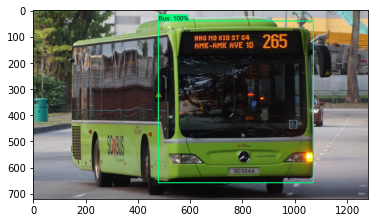

In [19]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')